In [1]:
import dynamics as mce
from scipy import spatial, cluster
import numpy as np 

In [2]:
def find_chi(n_comps = 3):
    n_phases = 0
    while n_phases < n_comps+1:
        chi = mce.random_interaction_matrix(num_comp = n_comps,)
        phis_initial = mce.get_uniform_random_composition(num_phases = 3*n_comps, num_comps = n_comps)
        phis_final = mce.evolve_dynamics(chis = chi, phis_init = phis_initial)
        n_phases = mce.count_phases(phis_final)
    return chi

def calculate_free_energy_density(phi: np.ndarray, chi: np.ndarray) -> float:
    phi0 = 1 - np.sum(phi)
    return np.dot(phi, np.dot(chi, phi)) + phi0*np.log(phi0) + np.sum(phi*np.log(phi))

def calculate_total_free_energy(phi_in:np.ndarray, phis: np.ndarray, chi: np.ndarray) -> float:
    n_phases = phis.shape[0]
    n_components = len(phi_in)
    M = np.zeros((n_components+1,n_phases))
    M[0] = np.ones(n_phases)
    # print(M)
    print(np.transpose(phis))
    for i in range(n_components):
        M[i+1] = np.transpose(phis)[i]
    print(M)
    print(np.linalg.matrix_rank(M))
    b = np.zeros(n_components + 1)
    b[0] = 1
    for i in range(n_components):
        b[i+1] = phi_in[i]
    # print(b)
    V = np.linalg.solve(M, b)
    
    free_energy_densities_ = np.array([calculate_free_energy_density(phi, chi) for phi in phis])
    print("Free energy of homogeneous state: ", np.dot( phi_in,V))
    print("Free energy after minimization: ", np.dot(V, free_energy_densities_))
    return np.dot(free_energy_densities_,V)

    
    

In [3]:
chi = np.loadtxt("chi.txt")
phi_in = np.array([0.1,0.1,0.3])
phis = phis_initial = mce.get_uniform_random_composition(num_phases = 3, num_comps = 3)
print(phis)
calculate_total_free_energy(phi_in = phi_in, phis = phis, chi = 0)


FileNotFoundError: chi.txt not found.

In [3]:
a=np.array(0,1)
b=(0,1)
print(a)

(0, 1)


In [4]:
n_components = 3
n_phases_guess = 10
chi = mce.random_interaction_matrix(num_comp = n_components)
# chi = np.loadtxt('chi.csv',delimiter=",")
phis_initial = mce.get_uniform_random_composition(num_phases = n_phases_guess, num_comps = n_components)
phis_final = mce.modified_evolve_dynamics(chis = chi, phis_init = phis_initial)
print("Number of Phases: ", mce.count_phases(phis_final))
print("Phase compositions:")
print(phis_final)
print("Chemical Potentials and Pressures:")
for i in range(len(phis_final)):
    print(mce.calc_diffs(phis_final[i], chi))

Number of Phases:  3
Phase compositions:
[[0.03583242 0.61606569 0.08893412]
 [0.67495574 0.02842588 0.05534563]
 [0.1057223  0.14576781 0.44034   ]
 [0.67495574 0.02842588 0.05534563]
 [0.03583242 0.61606569 0.08893412]
 [0.67495574 0.02842588 0.05534563]
 [0.67495574 0.02842588 0.05534563]
 [0.1057223  0.14576781 0.44034   ]
 [0.1057223  0.14576781 0.44034   ]
 [0.1057223  0.14576781 0.44034   ]]
Chemical Potentials and Pressures:
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021155)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021146)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021137)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021146)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021155)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021146)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021146)
(array([1.38693054, 1.36323171, 1.3034786 ]), 1.6693018338021137)
(array([1.38693054, 1.36323171, 1.3

In [9]:
phis_final = collapse_phases(phis_final)
print(phis_final)
for phi in phis_final:
    print(mce.calc_diffs(phi, chi))


[[0.09122498 0.65074603 0.09833971]
 [0.25448779 0.23213299 0.3071553 ]
 [0.12810808 0.12115052 0.57707905]
 [0.62513766 0.09827871 0.11193463]]
(array([2.05413979, 2.06111148, 2.04386772]), 2.291609525806635)
(array([2.05413979, 2.06111148, 2.04386772]), 2.291609525806626)
(array([2.05413979, 2.06111148, 2.04386772]), 2.2916095258066473)
(array([2.05413979, 2.06111148, 2.04386772]), 2.2916095258066393)


In [2]:
chi = np.loadtxt('chi.csv',delimiter=",")
phis = np.loadtxt('phis.csv',delimiter=",")
phis_in = np.array([0.29696043, 0.2159248,  0.31174007])
calculate_total_free_energy(phi_in = phis_in, phis = phis, chi = chi)


NameError: name 'np' is not defined

In [30]:
V = [0.15,0.2,0.35,0.3]
print(np.dot(np.transpose(phis),V))


[0.29696043 0.2159248  0.31174007]


In [6]:
epsilon = 1e-4
perturbation = np.random.rand(phis_final.shape[0], phis_final.shape[1])
perturbation -= np.ones_like(perturbation)*0.5
perturbation *= epsilon 
print("Perturbation:", perturbation)

mce.TOLERANCE = 1e-16
mce.ALPHA = 1e-10

print("before perturbation:")
print(phis_final)
for phi in phis_final:
    print(mce.calc_diffs(phi, chi))
print("after perturbation:")
phis_test = mce.evolve_dynamics(chis = chi, phis_init = phis_final+perturbation)
print(phis_test)
for phi in phis_test:
    print(mce.calc_diffs(phi, chi))

before perturbation:
[[0.80204656 0.02044576 0.01900522]
 [0.03354739 0.13558672 0.62994687]
 [0.03605423 0.62334646 0.13795814]]
after perturbation:
[[0.80205488 0.02044517 0.01900466]
 [0.0335452  0.13557953 0.62996707]
 [0.03605189 0.62336738 0.13795056]]
(array([1.80553014, 1.71901832, 1.72212778]), 1.990878238946315)
(array([1.80553014, 1.71901832, 1.72212778]), 1.9908782389463149)
(array([1.80553014, 1.71901832, 1.72212778]), 1.9908782389463155)


In [8]:
calculate_total_free_energy(phi_in=np.array([0.1,0.1,0.3]), phis=phis_final, chi=chi)

[[0.66243189 0.08521601 0.06172802]
 [0.03159455 0.35085814 0.13902631]
 [0.02916406 0.19606793 0.45509899]]
[[1.         1.         1.        ]
 [0.66243189 0.08521601 0.06172802]
 [0.03159455 0.35085814 0.13902631]
 [0.02916406 0.19606793 0.45509899]]
3
(array([0.13143426, 0.14882903, 0.68873843]), array([0.00762225]), np.int32(3), array([1.86152845, 0.56653696, 0.23124031]))


(array([0.13143426, 0.14882903, 0.68873843]),
 array([0.00762225]),
 np.int32(3),
 array([1.86152845, 0.56653696, 0.23124031]))

In [10]:
n_components = 2
n_phases_guess = 6
chi = np.loadtxt('chi.csv',delimiter=",")
phis_initial = mce.get_uniform_random_composition(num_phases = n_phases_guess, num_comps = n_components)

phis_final = mce.evolve_dynamics(chis = chi, phis_init = phis_initial)
print("Number of Phases: ", mce.count_phases(phis_final))
print(phis_final)


Number of Phases:  2
[[0.48518457 0.08022383]
 [0.08021077 0.48520735]
 [0.48518457 0.08022383]
 [0.08021077 0.48520735]
 [0.48518457 0.08022383]
 [0.48518457 0.08022383]]


(0.0, 0.5)

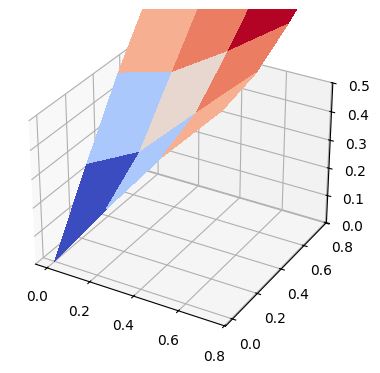

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the Axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(0, 1, 0.25)
Y = np.arange(0, 1, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, .5)
# fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the Axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# X, Y, Z = get_test_data(0.05)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# plt.show()

[[0.1 0.2 0.3]
 [0.1 0.2 0.3]
 [0.1 0.2 0.3]]
[[0.1 0.1 0.1]
 [0.2 0.2 0.2]
 [0.3 0.3 0.3]]
[0.1 0.1]
-0.5501473513934387
[0.2 0.1]
-0.6240495360298609
[0.3 0.1]
-0.6312922000865651
[0.1 0.2]
-0.6240495360298609
[0.2 0.2]
-0.5947325062062818
[0.3 0.2]
-0.4963459645241443
[0.1 0.3]
-0.6312922000865651
[0.2 0.3]
-0.4963459645241443
[0.3 0.3]
-0.2889394010345797
[[-0.55014735 -0.62404954 -0.6312922 ]
 [-0.62404954 -0.59473251 -0.49634596]
 [-0.6312922  -0.49634596 -0.2889394 ]]


(0.0, 0.5)

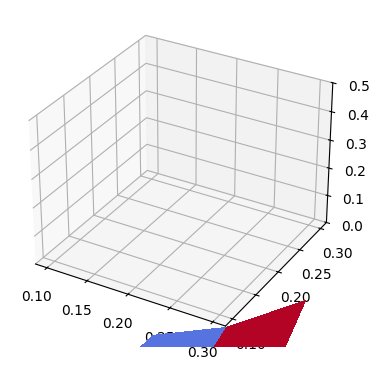

In [13]:
chi = np.loadtxt('chi.csv',delimiter=",")
nPoints = 3
X = np.linspace(0.1,0.3,nPoints)
Y = np.linspace(0.1,0.3,nPoints)
X, Y = np.meshgrid(X, Y)
print(X)
print(Y)
phis = [[] for i in range(nPoints)]
free_energies = np.zeros_like(X)
for i in range(nPoints):
    for j in range(nPoints):
        phis[i].append(np.array([X[i,j], Y[i,j]]))

for i in range(nPoints):
    for j in range(nPoints):
        print(phis[i][j])
        free_energies[i,j] = free_energy(phis[i][j], chi)
        print(free_energies[i,j])
print(free_energies)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the Axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')



surf = ax.plot_surface(X, Y, free_energies, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, .5)

In [6]:

n_components = 3
n_phases_guess = 4
chi = np.loadtxt('data/chi.csv',delimiter=",")
phis_initial = mce.get_uniform_random_composition(num_phases = n_phases_guess, num_comps = n_components)

phis_final = mce.evolve_dynamics(chis = chi, phis_init = phis_initial)
print(mce.count_phases(phis_final))
print(phis_final)
for phi in phis_final:

    print(mce.calc_diffs(phis = phi, chis = chi))
from scipy import spatial, cluster

dists = spatial.distance.pdist(phis_final)
links = cluster.hierarchy.linkage(dists, method="centroid")
clusters = cluster.hierarchy.fcluster(links,1e-2, criterion="distance")
n_clusters = len(set(clusters))

phis_out = [[] for _ in range(n_clusters)]
for i, c in enumerate(clusters):
    phis_out[c-1].append(phis_final[i])
for i, phi in enumerate(phis_out):
    phis_out[i] = np.mean(phi, axis=0)
print(phis_out)
for phi in phis_out:

    print(mce.calc_diffs(phis = phi, chis = chi))
# phis_test = mce.evolve_dynamics(chis = chi, phis_init = phis_out, tol = 1e-8)
# print(phis_test)

FileNotFoundError: data/chi.csv not found.